In [23]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [16]:
# Load the Boston Housing dataset
(train_data, train_labels), (test_data, test_labels) = datasets.boston_housing.load_data()

In [17]:
# Normalize the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [18]:
# Build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

/home/oscar/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,365 (60.02 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,244 (40.02 KB)

In [5]:
# Compile the model
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])

In [6]:
# Train the model
history = model.fit(train_data, train_labels, epochs=100, batch_size=16, 
                    validation_data=(test_data, test_labels), verbose=0)

In [7]:
# Evaluate the model
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=2)
print(f'\nTest MAE: {test_mae}')

4/4 - 0s - 17ms/step - loss: 16.5462 - mae: 2.5101

Test MAE: 2.510080575942993


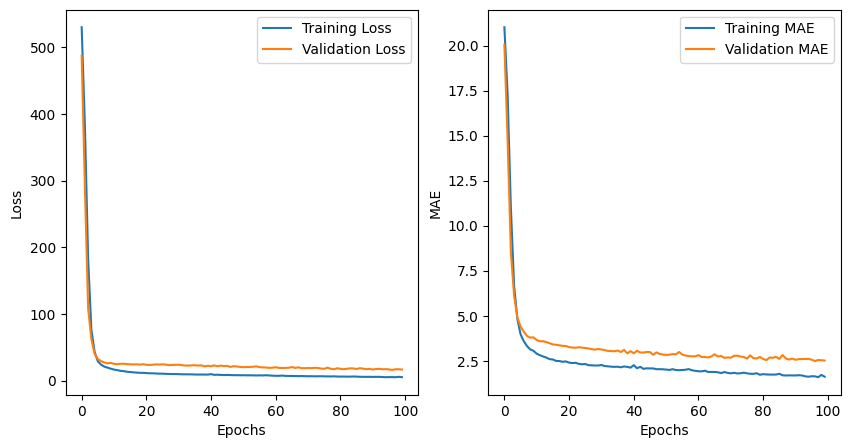

In [8]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

# Prédiction d'une variable numérique

In [19]:
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Construire le modèle MLP
model = models.Sequential()
# Ajouter une couche Dense d'entrée avec 64 neurones et une activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Ajouter une deuxième couche Dense avec 64 neurones et une activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(64, activation='relu'))
# Ajouter une couche de sortie Dense avec une seule neurone (prix de l'immobilier)
model.add(layers.Dense(1))
model.summary()

/home/oscar/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compiler le modèle avec les paramètres suivants :
model.compile(
    optimizer=RMSprop(learning_rate=0.001),  # Optimiseur RMSprop avec un taux d'apprentissage de 0.001
    loss='mse',                             # Fonction de perte : Erreur quadratique moyenne (Mean Squared Error)
    metrics=['mae']                         # Métrique d'évaluation : Erreur absolue moyenne (Mean Absolute Error)
)


Qu'est-ce que le Learning Rate ? Le learning rate détermine la taille des pas que l'algorithme fait à chaque itération pour ajuster les poids du modèle afin de minimiser l'erreur ou la perte.

In [25]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 566.5801 - mae: 21.8270 - val_loss: 564.6176 - val_mae: 21.9464
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 452.0717 - mae: 19.4270 - val_loss: 489.5332 - val_mae: 20.2094
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 390.9680 - mae: 17.8222 - val_loss: 406.9876 - val_mae: 18.1955
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 314.3219 - mae: 15.7273 - val_loss: 319.8177 - val_mae: 15.7973
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 225.1193 - mae: 12.9401 - val_loss: 230.6971 - val_mae: 12.9609
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 165.4477 - mae: 10.5527 - val_loss: 162.0922 - val_mae: 10.3362
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 116.6509 - mae: 8.6983 - val_loss: 111.8799 - val_mae: 8.1144
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.6688 - mae: 6.3035 - val_loss: 83.7057 - val_mae: 6.9235
Epoch 9/100
11/11 ━━━

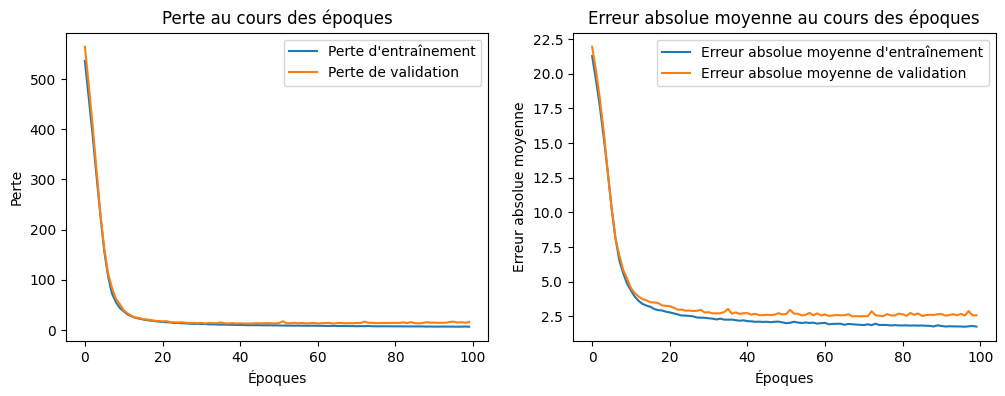

In [26]:
# Tracer les courbes de perte et d'erreur absolue moyenne
plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au cours des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Courbe d'erreur absolue moyenne
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Erreur absolue moyenne d\'entraînement')
plt.plot(history.history['val_mae'], label='Erreur absolue moyenne de validation')
plt.title('Erreur absolue moyenne au cours des époques')
plt.xlabel('Époques')
plt.ylabel('Erreur absolue moyenne')
plt.legend()

plt.show()

In [27]:
# Évaluer le modèle
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Perte sur les données de test: {test_loss}')
print(f'Erreur absolue moyenne sur les données de test: {test_mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.6683 - mae: 3.1044 
Perte sur les données de test: 27.13154411315918
Erreur absolue moyenne sur les données de test: 3.2610788345336914


In [28]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [29]:
# Prédire les prix avec le modèle
y_pred = model.predict(X_test)

# Afficher quelques prédictions et les valeurs réelles
for i in range(10):
    print(f'Prix prédit: {y_pred[i][0]:.2f}, Prix réel: {y_test[i]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Prix prédit: 9.45, Prix réel: 7.2
Prix prédit: 18.95, Prix réel: 18.8
Prix prédit: 20.28, Prix réel: 19.0
Prix prédit: 34.73, Prix réel: 27.0
Prix prédit: 24.17, Prix réel: 22.2
Prix prédit: 19.74, Prix réel: 24.5
Prix prédit: 27.34, Prix réel: 31.2
Prix prédit: 21.21, Prix réel: 22.9
Prix prédit: 19.69, Prix réel: 20.5
Prix prédit: 23.12, Prix réel: 23.2


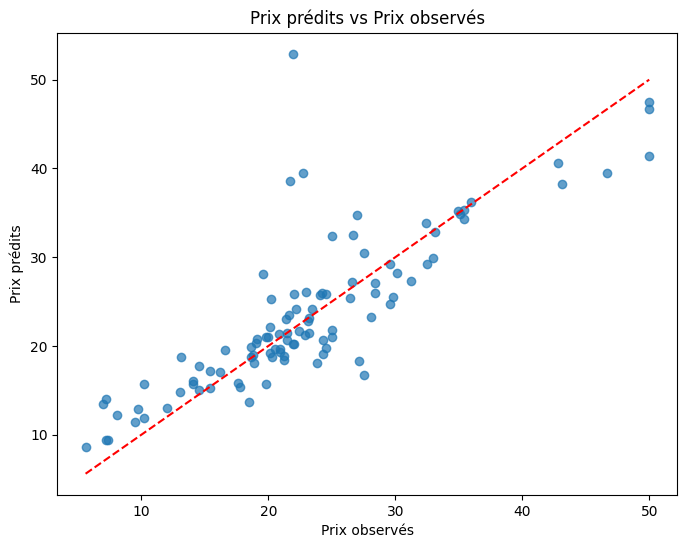

In [30]:
# Tracer les valeurs prédites en fonction des valeurs observées
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Prix observés')
plt.ylabel('Prix prédits')
plt.title('Prix prédits vs Prix observés')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ajouter une ligne de référence
plt.show()